In [73]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Error Metrics
from sklearn.metrics import mean_squared_error

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')


In [28]:
# importing all the cleaned data 
house_spend_df = pd.read_csv('../cleaned-data/household_spend_cleaned.csv')
gdp_yearly_df =  pd.read_csv('../cleaned-data/gdp_yearly_cleaned.csv')
trade_in_gs_df = pd.read_csv('../cleaned-data/trade_in_gs_cleaned.csv')

In [29]:
# dropping unnecessary columns
# house_spend_df = house_spend_df[['LOCATION','TIME','HOUSESPEND']]  
# gdp_yearly_df = gdp_yearly_df[['LOCATION','TIME','HOUSESPEND']] 
# trade_in_gs_df.head()
gdp_yearly_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
trade_in_gs_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
house_spend_df.drop(['Unnamed: 0'], axis = 1, inplace = True)


In [30]:
print(gdp_yearly_df.head())
print(trade_in_gs_df.head())
print(house_spend_df.head())

  LOCATION  TIME  GDPMLNUSD
0      AUS  1960  25071.833
1      AUS  1961  25363.455
2      AUS  1962  27953.904
3      AUS  1963  30431.547
4      AUS  1964  32742.466
  LOCATION  TIME     IMPVAL     EXPVAL    NTRVAL
0      AUS  1959  12041.643  10820.433  1221.210
1      AUS  1960  12642.489  12174.641   467.848
2      AUS  1961  14354.739  10438.873  3915.866
3      AUS  1962  14034.969  12247.425  1787.544
4      AUS  1963  16349.677  13623.688  2725.988
  LOCATION  TIME    HOUSESPEND
0      AUS  1970  30476.510257
1      AUS  1971  32799.844017
2      AUS  1972  35590.183565
3      AUS  1973  41114.456624
4      AUS  1974  48461.851872


In [31]:
# merging all three datasets to get a final dataset with the features 
final_df = pd.merge(trade_in_gs_df,gdp_yearly_df,how='outer',on=['LOCATION','TIME'])
final_df = pd.merge(house_spend_df,final_df,how='outer',on=['LOCATION','TIME'])

In [32]:
final_df.isnull().sum()
len(final_df)

2785

In [33]:
# drop the null rows from the final_df 

final_df.dropna(inplace = True)
len(final_df)

1352

In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 0 to 1351
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    1352 non-null   object 
 1   TIME        1352 non-null   int64  
 2   HOUSESPEND  1352 non-null   float64
 3   IMPVAL      1352 non-null   float64
 4   EXPVAL      1352 non-null   float64
 5   NTRVAL      1352 non-null   float64
 6   GDPMLNUSD   1352 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 84.5+ KB


In [36]:
# keeping the top 10 countries and dropping the rest
final_df['LOCATION'].value_counts()
final_df = final_df[final_df['LOCATION'].isin(['AUS','GBR','SWE','ESP','NLD','JPN','FRA','USA','ITA','CAN'])]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 1351
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    520 non-null    object 
 1   TIME        520 non-null    int64  
 2   HOUSESPEND  520 non-null    float64
 3   IMPVAL      520 non-null    float64
 4   EXPVAL      520 non-null    float64
 5   NTRVAL      520 non-null    float64
 6   GDPMLNUSD   520 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 32.5+ KB


In [37]:
# converting the location tag using one hot encoding
test_y = pd.get_dummies(final_df.LOCATION, prefix='LOCATION')
print(test_y.head())

   LOCATION_AUS  LOCATION_CAN  LOCATION_ESP  LOCATION_FRA  LOCATION_GBR  \
0             1             0             0             0             0   
1             1             0             0             0             0   
2             1             0             0             0             0   
3             1             0             0             0             0   
4             1             0             0             0             0   

   LOCATION_ITA  LOCATION_JPN  LOCATION_NLD  LOCATION_SWE  LOCATION_USA  
0             0             0             0             0             0  
1             0             0             0             0             0  
2             0             0             0             0             0  
3             0             0             0             0             0  
4             0             0             0             0             0  


In [38]:
final2_df = pd.concat([final_df, test_y], axis=1)

In [41]:
final2_df.drop('LOCATION',axis=1,inplace=True)

In [55]:
X = final2_df.iloc[:,0:5]
X2 = final2_df.iloc[:,6:]
X = pd.concat([X,X2],axis=1)
X.head()

,TIME,HOUSESPEND,IMPVAL,EXPVAL,NTRVAL,LOCATION_AUS,LOCATION_CAN,LOCATION_ESP,LOCATION_FRA,LOCATION_GBR,LOCATION_ITA,LOCATION_JPN,LOCATION_NLD,LOCATION_SWE,LOCATION_USA
0,1970,30476.510257,26166.900,21515.885,4651.015,1,0,0,0,0,0,0,0,0,0
1,1971,32799.844017,28126.367,19799.966,8326.401,1,0,0,0,0,0,0,0,0,0
2,1972,35590.183565,28692.818,20049.929,8642.889,1,0,0,0,0,0,0,0,0,0
3,1973,41114.456624,26958.533,26132.838,825.695,1,0,0,0,0,0,0,0,0,0
4,1974,48461.851872,29595.699,26804.796,2790.903,1,0,0,0,0,0,0,0,0,0


In [57]:
y = final2_df['GDPMLNUSD']
y.head()

0    58911.123
1    64192.384
2    69871.924
3    78914.750
4    86394.431
Name: GDPMLNUSD, dtype: float64

In [59]:
corr = X.corr()
corr

,TIME,HOUSESPEND,IMPVAL,EXPVAL,NTRVAL,LOCATION_AUS,LOCATION_CAN,LOCATION_ESP,LOCATION_FRA,LOCATION_GBR,LOCATION_ITA,LOCATION_JPN,LOCATION_NLD,LOCATION_SWE,LOCATION_USA
TIME,1.000000e+00,0.337199,0.567775,0.496671,-0.172137,3.743263e-15,9.636508e-15,-1.441446e-14,1.070894e-14,8.552507e-16,1.214972e-14,-4.727304e-15,-2.852524e-14,-1.231000e-16,1.075389e-14
HOUSESPEND,3.371989e-01,1.000000,0.924319,0.964134,-0.895709,-1.265573e-01,-1.032204e-01,-1.013339e-01,-5.744789e-02,-4.801259e-02,-6.039314e-02,4.227845e-02,-1.386803e-01,-1.524513e-01,7.458183e-01
IMPVAL,5.677751e-01,0.924319,1.000000,0.985504,-0.741277,-2.160856e-01,-6.880072e-02,-1.459107e-01,2.327128e-02,7.746317e-02,-3.427017e-02,2.300237e-02,-4.774842e-02,-2.170765e-01,6.061553e-01
EXPVAL,4.966713e-01,0.964134,0.985504,1.000000,-0.844404,-1.861396e-01,-7.707892e-02,-1.332119e-01,-1.126188e-03,3.232218e-02,-5.452917e-02,3.265641e-02,-7.815428e-02,-1.944034e-01,6.596649e-01
NTRVAL,-1.721367e-01,-0.895709,-0.741277,-0.844404,1.000000,5.409810e-02,8.769698e-02,6.628899e-02,7.793760e-02,1.167252e-01,1.075190e-01,-5.656424e-02,1.584268e-01,8.366305e-02,-6.957914e-01
LOCATION_AUS,3.743263e-15,-0.126557,-0.216086,-0.186140,0.054098,1.000000e+00,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01
LOCATION_CAN,9.636508e-15,-0.103220,-0.068801,-0.077079,0.087697,-1.111111e-01,1.000000e+00,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01
LOCATION_ESP,-1.441446e-14,-0.101334,-0.145911,-0.133212,0.066289,-1.111111e-01,-1.111111e-01,1.000000e+00,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01
LOCATION_FRA,1.070894e-14,-0.057448,0.023271,-0.001126,0.077938,-1.111111e-01,-1.111111e-01,-1.111111e-01,1.000000e+00,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01
LOCATION_GBR,8.552507e-16,-0.048013,0.077463,0.032322,0.116725,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,1.000000e+00,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01


<AxesSubplot:>

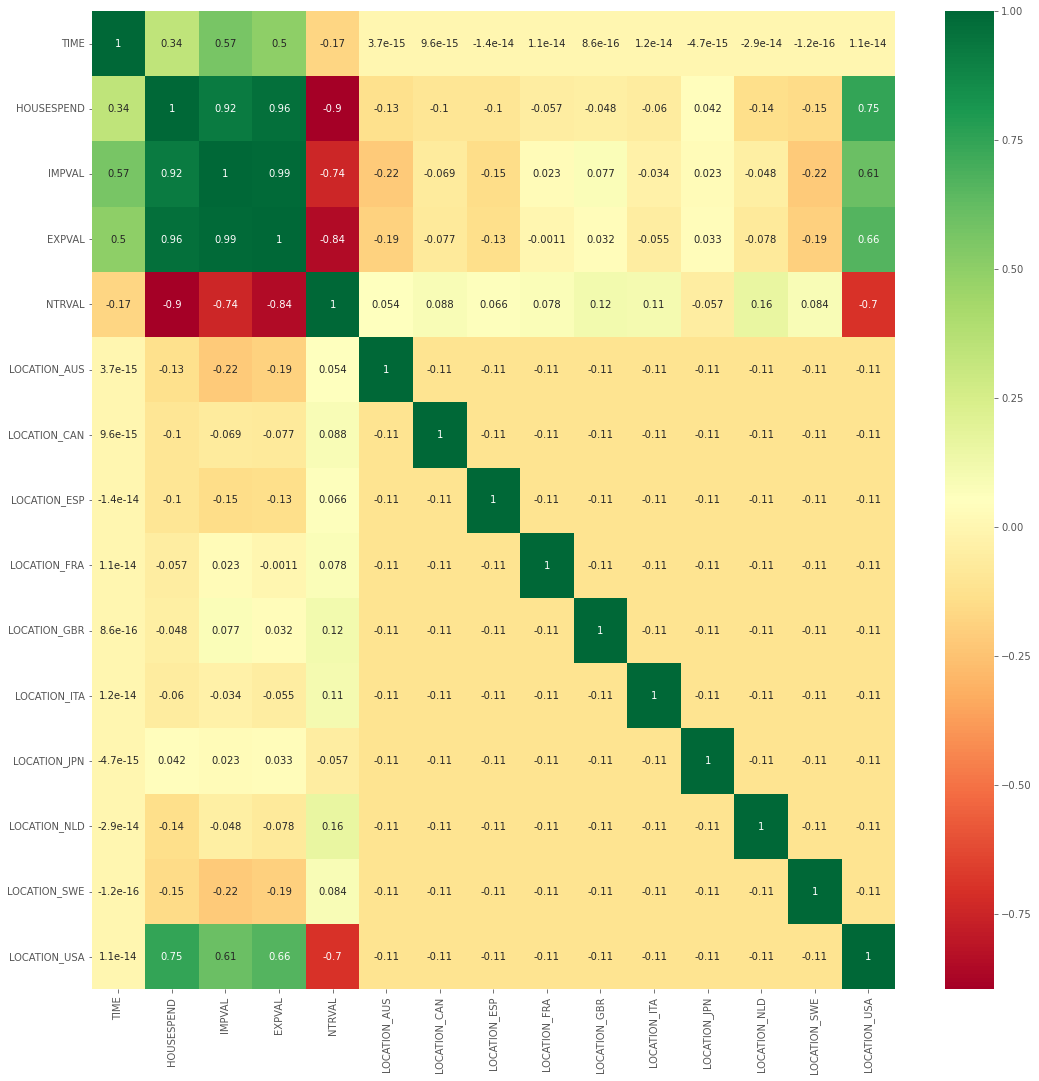

In [60]:
top_corr_features=corr.index 
plt.figure(figsize=(18,18))
#plot heat map 
sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [62]:
# Creating train test splits
validation_size = 0.2
# train_size = int(len(X) * (1-validation_size))
# X_train, X_test = X[0:train_size], X[train_size:len(X)]
# Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=42)

In [76]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 
model = ExtraTreesRegressor()

## K Fold analysis:
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
#converted mean square error to positive. The lower the beter
cv_results = -1* cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
kfold_results = cv_results


# Full Training period
res = model.fit(X_train, y_train)
train_result = mean_squared_error(res.predict(X_train), y_train)


# Test results
test_result = mean_squared_error(res.predict(X_test), y_test)

msg = "%s: %f (%f) %f %f" % ('ExtraTreesRegressor', cv_results.mean(), cv_results.std(), train_result, test_result)
print(msg)

ExtraTreesRegressor: 14215359347.994354 (18141229650.461258) 0.000000 47204338588.574219


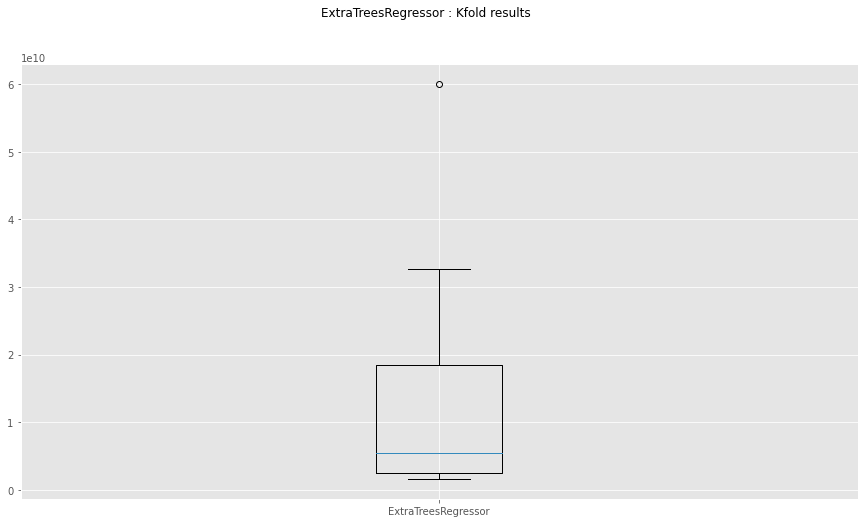

In [80]:
from matplotlib import pyplot

fig = pyplot.figure()
fig.suptitle('ExtraTreesRegressor : Kfold results')
ax = fig.add_subplot()
pyplot.boxplot(kfold_results)
ax.set_xticklabels(['ExtraTreesRegressor'])
fig.set_size_inches(15,8)
pyplot.show()